# 5. Analyze & Share phase
## 5.1 Feature Selection

I'll use some of the methods to select the features that would provide the best patterns or insights. These would be:

1. Correlation
2. Extra Trees Regressor
3. RFECV
4. Linear Regression
5. Lasso (L1 reg)
6. Ridge
7. Ensemble 
8. hyperparameter tuning


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/news_share_model_ready.csv')
test_df = pd.read_csv('data/news_test_data.csv')
print(df.shape)
print(test_df.shape)
df.head()




(999, 57)
(999, 57)


,cleaned_title,cleaned_text,weekday,is_weekend,month,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,Business,0,0,0,0,0,0.640816,5,3,1.0,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,3,2441.637795,2316.046429,2312.036810,3,102,2,0,0,49,28,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.97,-40.52
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,Tech,0,0,0,0,1,0.549618,4,1,0.0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,4,2233.879630,2316.046429,2676.025510,8,54,5,0,2,20,16,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.28,8.21
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,Tech,0,0,0,0,1,0.577236,8,1,0.0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,4,2233.879630,2316.046429,2676.025510,8,239,3,1,3,103,56,53,0,0,0,0,0,0,0,5,5,0,17,0,0,0,80.28,-179.58
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,Tech,0,0,0,0,1,0.525896,4,1,0.0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,4,4,2233.879630,2316.046429,2676.025510,5,141,2,1,2,67,42,26,0,0,0,0,0,0,0,0,0,0,2,0,1,0,32.56,-80.11
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,Others,0,0,1,0,0,0.588889,6,9,0.0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,4,4,2233.879630,2316.046429,2208.388571,8,148,5,2,1,62,49,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,71.82,-95.67


In [2]:
test_df.head()

,cleaned_title,cleaned_text,weekday,is_weekend,month,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,Business,0,0,0,0,0,0.640816,5,3,1.0,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,3,2441.637795,2316.046429,2312.036810,3,102,2,0,0,49,28,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.97,-40.52
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,Tech,0,0,0,0,1,0.549618,4,1,0.0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,4,2233.879630,2316.046429,2676.025510,8,54,5,0,2,20,16,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.28,8.21
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,Tech,0,0,0,0,1,0.577236,8,1,0.0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,4,2233.879630,2316.046429,2676.025510,8,239,3,1,3,103,56,53,0,0,0,0,0,0,0,5,5,0,17,0,0,0,80.28,-179.58
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,Tech,0,0,0,0,1,0.525896,4,1,0.0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,4,4,2233.879630,2316.046429,2676.025510,5,141,2,1,2,67,42,26,0,0,0,0,0,0,0,0,0,0,2,0,1,0,32.56,-80.11
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,Others,0,0,1,0,0,0.588889,6,9,0.0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,4,4,2233.879630,2316.046429,2208.388571,8,148,5,2,1,62,49,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,71.82,-95.67


In [3]:
df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'month no', 'weekday no',
       'avg shares daily', 'avg shares weekly', 'avg shares by channel',
       'title_tokens', 'text_tokens', 'noun_count_title', 'verb_count_title',
       'adjective_count_title', 'noun_count_text', 'verb_count_text',
       'adjective_count_text', 'amazon fire', 'april fools', 'fire tv',
       'game thrones', 'google glass', 'need know', 'report says',
       '2014opens n

In [4]:
test_df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'month no', 'weekday no',
       'avg shares daily', 'avg shares weekly', 'avg shares by channel',
       'title_tokens', 'text_tokens', 'noun_count_title', 'verb_count_title',
       'adjective_count_title', 'noun_count_text', 'verb_count_text',
       'adjective_count_text', 'amazon fire', 'april fools', 'fire tv',
       'game thrones', 'google glass', 'need know', 'report says',
       '2014opens n

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cleaned_title               999 non-null    object 
 1   cleaned_text                999 non-null    object 
 2   weekday                     999 non-null    object 
 3   is_weekend                  999 non-null    int64  
 4   month                       999 non-null    object 
 5   cleaned_data_channel        999 non-null    object 
 6   Channel_Entertainment       999 non-null    int64  
 7   Channel_Lifestyle           999 non-null    int64  
 8   Channel_Others              999 non-null    int64  
 9   Channel_Social Media        999 non-null    int64  
 10  Channel_Tech                999 non-null    int64  
 11  unique_tokens_rate          999 non-null    float64
 12  num_hrefs                   999 non-null    int64  
 13  num_imgs                    999 non

## extras: Identifying outliers again as the model accuracy turned out abnormal

Columns like `is_weekend`, `month no`, `weekday no`, and categorical variables related to channels and tokens are not typically subjected to outlier clipping because they are categorical or represent discrete values.

In [6]:
num_df = df.drop(columns = ['cleaned_title', 'cleaned_text', 'weekday','month',
       'cleaned_data_channel',])
test_df = test_df.drop(columns = ['cleaned_title', 'cleaned_text', 'weekday','month',
       'cleaned_data_channel',])
num_df.shape
test_df.shape

(999, 52)

In [7]:
cols_to_treat = num_df.drop(columns = ['month no', 'weekday no','is_weekend', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech'])

In [8]:
cols_to_treat.shape

(999, 44)

Boxplot before clipping outliers

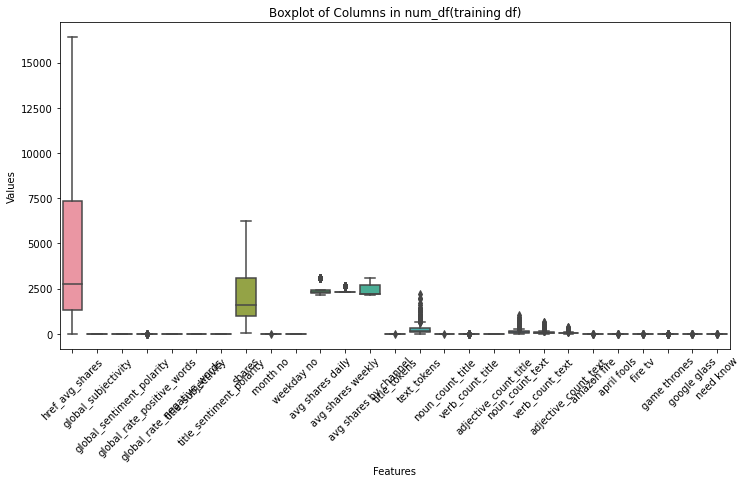

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = num_df.iloc[:,15:42])

plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in num_df(training df)')
plt.show()

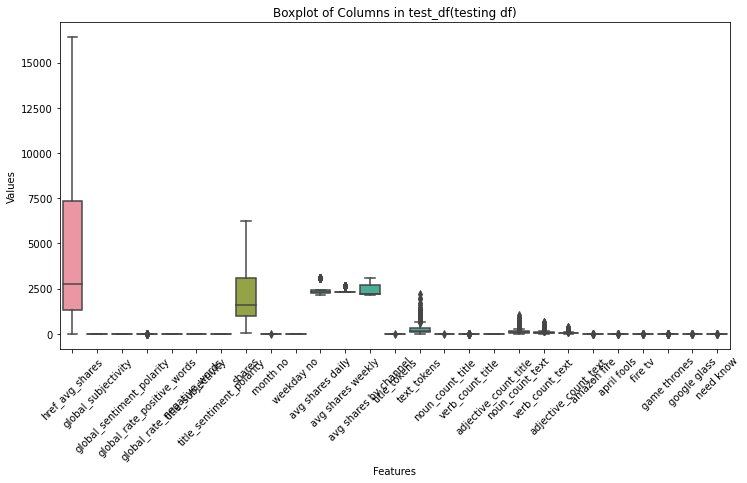

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = test_df.iloc[:,15:42])

plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df(testing df)')
plt.show()

In [11]:
print("\nDistribution (BEFORE outlier treatment):")
cols_to_treat.describe()


Distribution (BEFORE outlier treatment):


,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.532183,10.158158,4.260260,0.547548,4.675496,7.207207,1132.205907,5499.373117,3256.800153,4976.071248,0.450364,0.106496,0.037962,0.017433,0.293408,0.056851,2366.762763,2366.762763,2366.762763,2366.762763,6.740741,254.267267,3.743744,1.349349,1.146146,117.890891,69.647648,49.148148,0.007007,0.007007,0.010010,0.023023,0.010010,0.008008,0.007007,0.378378,0.180180,0.124124,3.885886,0.214214,0.150150,0.154154,60.316406,-202.034094
std,0.099346,7.654816,5.105337,0.807028,0.284113,1.859846,1181.656104,2231.951378,1047.739362,5258.348719,0.091591,0.087908,0.014989,0.009358,0.325482,0.170974,1812.447026,264.987744,116.628962,261.216199,1.612157,241.106151,1.330390,0.961731,0.929727,112.130833,69.618758,46.443774,0.083456,0.083456,0.099598,0.150052,0.099598,0.089173,0.083456,1.718394,0.838435,2.072486,6.577958,0.677552,0.365712,0.754585,26.597296,246.383643
min,0.272165,0.000000,0.000000,0.000000,3.942951,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.224646,-0.114407,0.001300,0.000000,0.000000,-0.225000,58.000000,2157.572687,2316.046429,2139.983784,2.000000,14.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.020000,-2213.300000
25%,0.466835,4.000000,1.000000,0.000000,4.490862,6.000000,0.000000,3613.040000,2534.726000,1300.000000,0.395563,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000,2233.879630,2316.046429,2208.388571,6.000000,106.500000,3.000000,1.000000,0.000000,49.000000,28.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46.440000,-272.620000
50%,0.533149,8.000000,2.000000,0.000000,4.685668,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102511,0.037325,0.016340,0.200000,0.000000,1600.000000,2284.658768,2316.046429,2208.388571,7.000000,176.000000,4.000000,1.000000,1.000000,82.000000,48.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,62.340000,-124.770000
75%,0.596615,14.000000,7.000000,1.000000,4.856136,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.162790,0.046892,0.022606,0.500000,0.150000,3100.000000,2441.637795,2316.046429,2676.025510,8.000000,320.500000,5.000000,2.000000,2.000000,146.000000,86.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,80.280000,-50.845000
max,0.791285,29.000000,16.000000,2.500000,5.404047,10.000000,3613.040000,10985.215000,5720.423500,16402.500000,0.680424,0.329107,0.074246,0.039680,1.000000,0.375000,6250.000000,3088.297872,2634.698113,3106.109091,11.000000,2226.000000,9.000000,5.00

In [12]:
'''# Outlier treatment using IQR method
def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers
    return num

for col in cols_to_treat:
    num_df = treat_outliers_iqr(num_df, col)

print("\nDistribution (after outlier treatment using IQR method):")
cols_to_treat.describe()'''
def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers
    return num

num_df_treated = num_df.copy()

for col in cols_to_treat:
    num_df_treated = treat_outliers_iqr(num_df, col)
    test_df_treated = treat_outliers_iqr(test_df, col)

print("\nDistribution (after outlier treatment using IQR method):")
num_df_treated.describe()



Distribution (after outlier treatment using IQR method):


,is_weekend,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.000000,999.0,999.0,999.0,999.000000,999.000000
mean,0.159159,0.185185,0.050050,0.350350,0.055055,0.196196,0.532183,10.158158,4.260260,0.547548,4.675496,7.207207,1132.205907,5499.373117,3256.800153,4976.071248,0.450364,0.106496,0.037962,0.017433,0.293408,0.056851,2366.762763,3.998999,3.814815,2332.384539,2.316046e+03,2366.762763,6.741742,235.207708,3.742743,1.333834,1.146146,108.633133,63.563564,45.530531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.211211,0.0,0.0,0.0,60.620521,-183.323243
std,0.366008,0.388642,0.218157,0.477319,0.228202,0.397318,0.099346,7.654816,5.105337,0.807028,0.284113,1.859846,1181.656104,2231.951378,1047.739362,5258.348719,0.091591,0.087908,0.014989,0.009358,0.325482,0.170974,1812.447026,0.031639,1.903151,176.843660,2.365871e-11,261.216199,1.609519,171.381671,1.326803,0.917933,0.929727,78.361715,47.244320,33.787394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.373009,0.0,0.0,0.0,25.711063,177.568477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272165,0.000000,0.000000,0.000000,3.942951,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.224646,-0.114407,0.001300,0.000000,0.000000,-0.225000,58.000000,3.000000,0.000000,2157.572687,2.316046e+03,2139.983784,3.000000,14.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-4.320000,-605.282500
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466835,4.000000,1.000000,0.000000,4.490862,6.000000,0.000000,3613.040000,2534.726000,1300.000000,0.395563,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000,4.000000,3.000000,2233.879630,2.316046e+03,2208.388571,6.000000,106.500000,3.000000,1.000000,0.000000,49.000000,28.000000,19.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,46.440000,-272.620000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533149,8.000000,2.000000,0.000000,4.685668,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102511,0.037325,0.016340,0.200000,0.000000,1600.000000,4.000000,4.000000,2284.658768,2.316046e+03,2208.388571,7.000000,176.000000,4.000000,1.000000,1.000000,82.000000,48.000000,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,62.340000,-124.770000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.596615,14.000000,7.000000,1.000000,4.856136,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.162790,0.046892,0.022606,0.500000,0.150000,3100.000000,4.000000,5.000000,2441.637795,2.316046e+03,2676.025510,8.000000,320.500000,5.000000,2.000000,2.000000,146.000000,86.000000,61.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.0,0.0,0.0,80.280000,-50.845000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

In [13]:
print("\nDistribution (after outlier treatment using IQR method for test data):")
test_df_treated.describe()


Distribution (after outlier treatment using IQR method for test data):


,is_weekend,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.000000,999.0,999.0,999.0,999.000000,999.000000
mean,0.159159,0.185185,0.050050,0.350350,0.055055,0.196196,0.532183,10.158158,4.260260,0.547548,4.675496,7.207207,1132.205907,5499.373117,3256.800153,4976.071248,0.450364,0.106496,0.037962,0.017433,0.293408,0.056851,2366.762763,3.998999,3.814815,2332.384539,2.316046e+03,2366.762763,6.741742,235.207708,3.742743,1.333834,1.146146,108.633133,63.563564,45.530531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.211211,0.0,0.0,0.0,60.620521,-183.323243
std,0.366008,0.388642,0.218157,0.477319,0.228202,0.397318,0.099346,7.654816,5.105337,0.807028,0.284113,1.859846,1181.656104,2231.951378,1047.739362,5258.348719,0.091591,0.087908,0.014989,0.009358,0.325482,0.170974,1812.447026,0.031639,1.903151,176.843660,2.365871e-11,261.216199,1.609519,171.381671,1.326803,0.917933,0.929727,78.361715,47.244320,33.787394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.373009,0.0,0.0,0.0,25.711063,177.568477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272165,0.000000,0.000000,0.000000,3.942951,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.224646,-0.114407,0.001300,0.000000,0.000000,-0.225000,58.000000,3.000000,0.000000,2157.572687,2.316046e+03,2139.983784,3.000000,14.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-4.320000,-605.282500
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466835,4.000000,1.000000,0.000000,4.490862,6.000000,0.000000,3613.040000,2534.726000,1300.000000,0.395563,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000,4.000000,3.000000,2233.879630,2.316046e+03,2208.388571,6.000000,106.500000,3.000000,1.000000,0.000000,49.000000,28.000000,19.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,46.440000,-272.620000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533149,8.000000,2.000000,0.000000,4.685668,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102511,0.037325,0.016340,0.200000,0.000000,1600.000000,4.000000,4.000000,2284.658768,2.316046e+03,2208.388571,7.000000,176.000000,4.000000,1.000000,1.000000,82.000000,48.000000,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,62.340000,-124.770000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.596615,14.000000,7.000000,1.000000,4.856136,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.162790,0.046892,0.022606,0.500000,0.150000,3100.000000,4.000000,5.000000,2441.637795,2.316046e+03,2676.025510,8.000000,320.500000,5.000000,2.000000,2.000000,146.000000,86.000000,61.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.0,0.0,0.0,80.280000,-50.845000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

Boxplot after clipping outliers

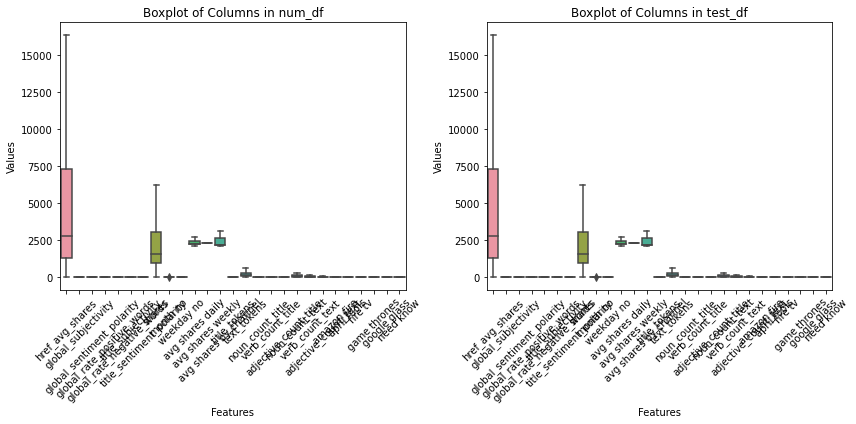

In [14]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=num_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in num_df')


plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=test_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

## 5.1.1 Correlations

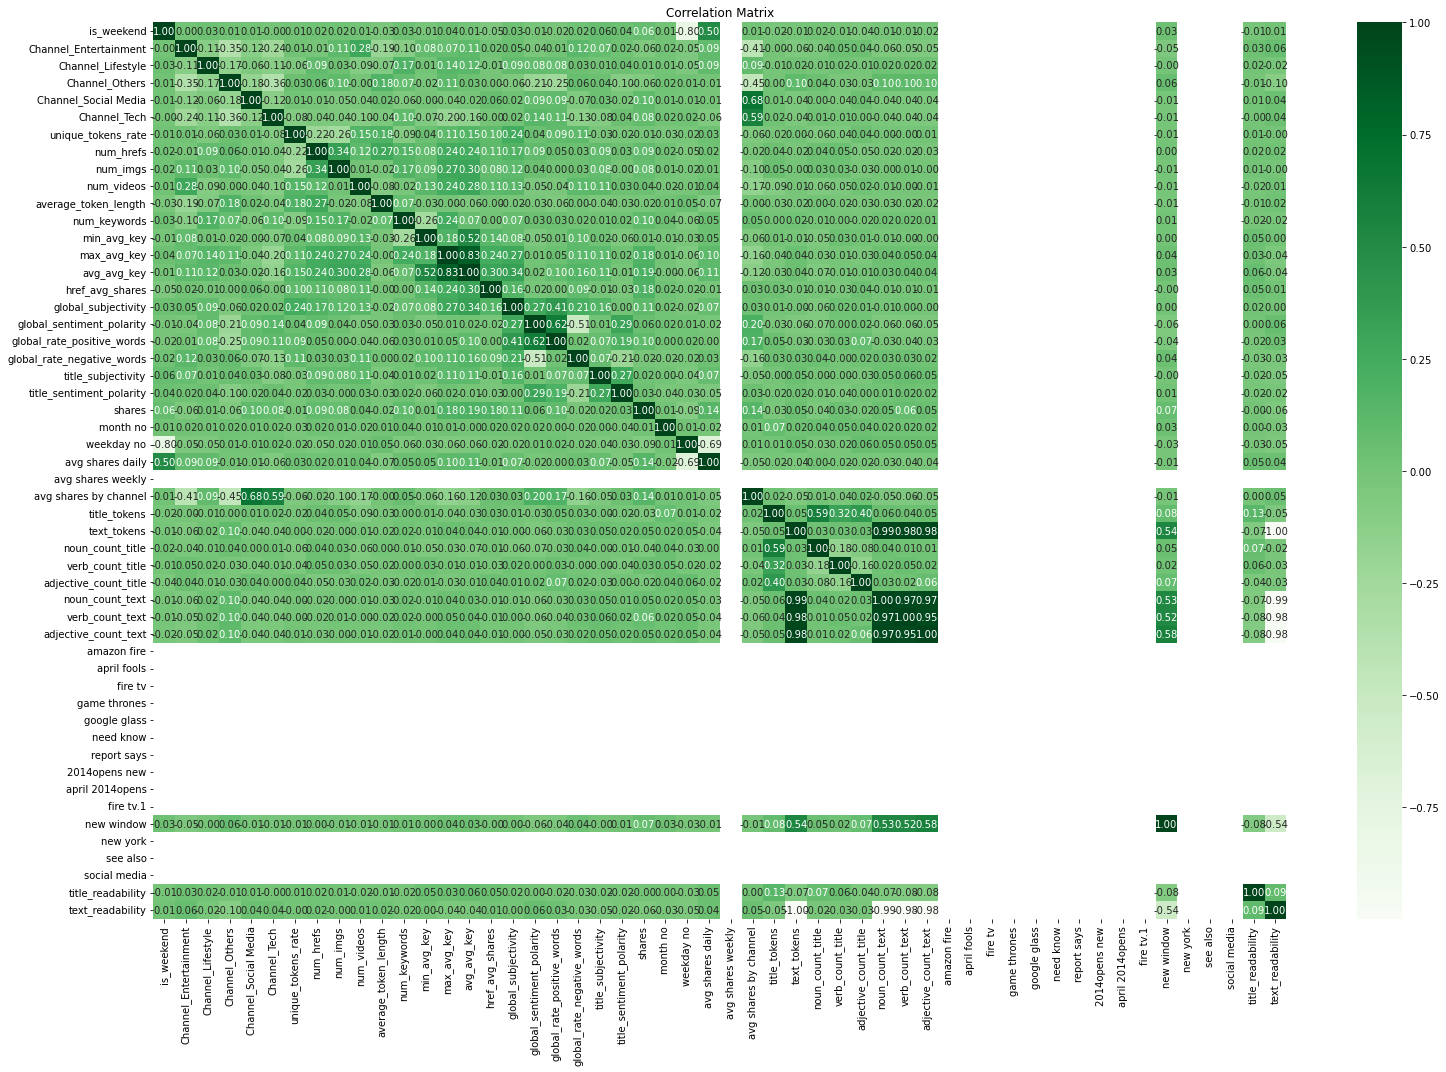

In [15]:


correlation_matrix = num_df_treated.corr()
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

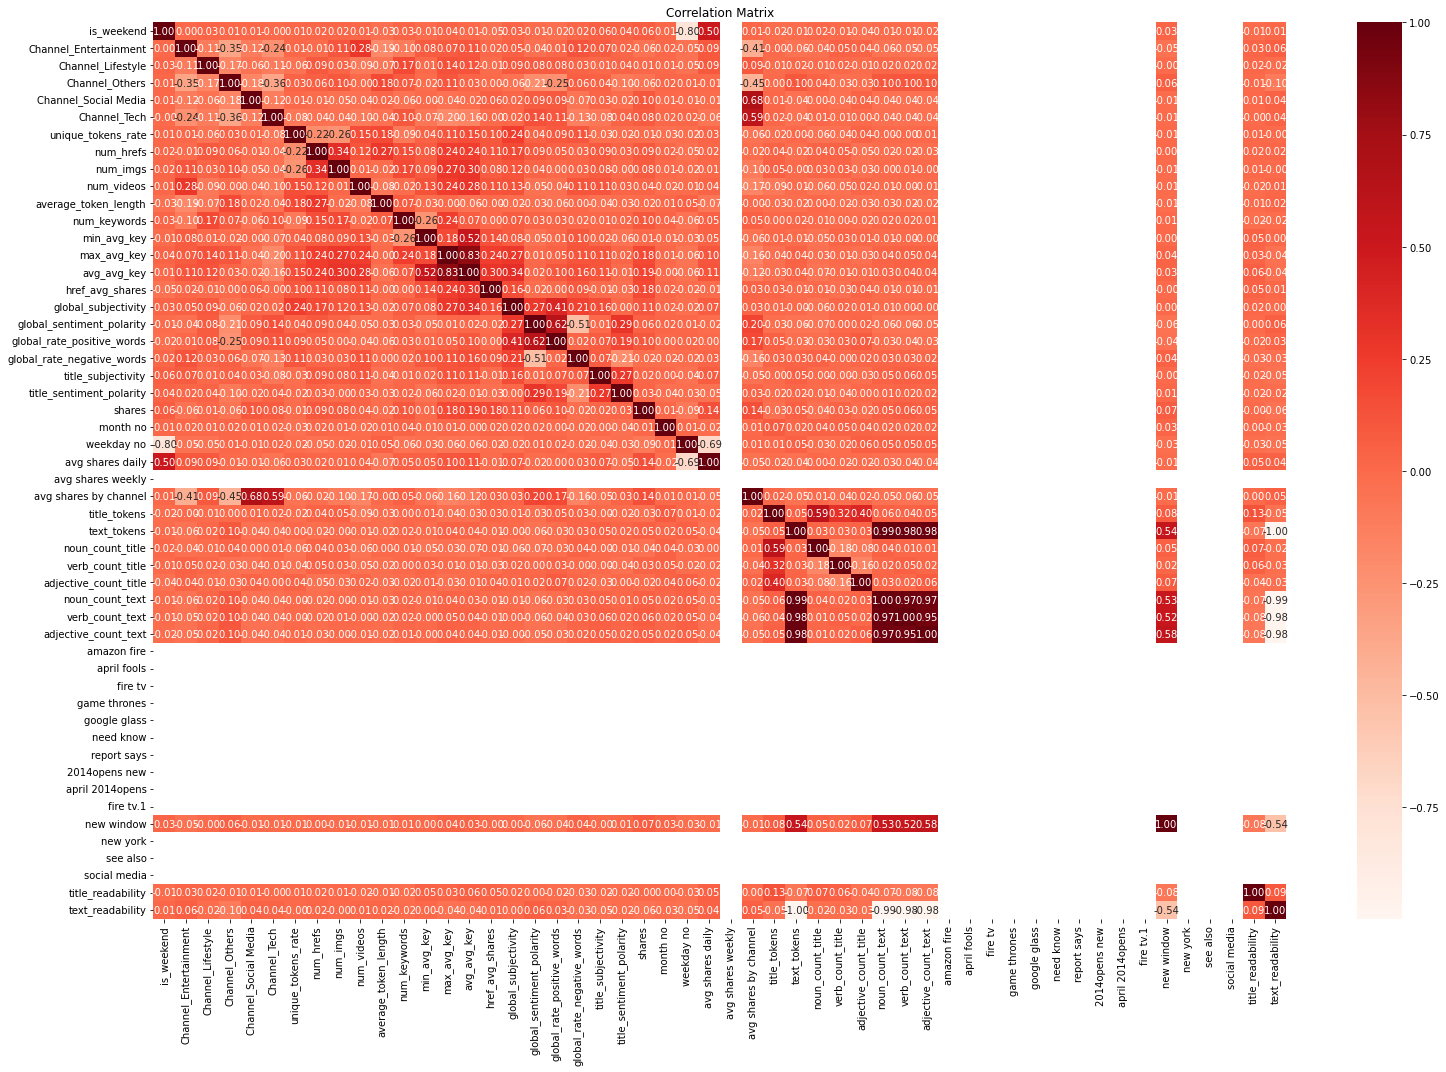

In [16]:
correlation_matrix = test_df_treated.corr()
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:

corr_with_target = correlation_matrix['shares'].sort_values(ascending=False)

top_correlated_features = corr_with_target[1:25]  
print(top_correlated_features)


avg_avg_key                   0.190891
href_avg_shares               0.180088
max_avg_key                   0.175701
avg shares by channel         0.144123
avg shares daily              0.142761
global_subjectivity           0.105557
num_keywords                  0.102101
global_rate_positive_words    0.099742
Channel_Social Media          0.098513
num_hrefs                     0.091711
Channel_Tech                  0.084343
num_imgs                      0.075050
new window                    0.066507
is_weekend                    0.064349
verb_count_text               0.063733
global_sentiment_polarity     0.055804
text_tokens                   0.054196
adjective_count_text          0.051020
noun_count_text               0.050920
num_videos                    0.038335
verb_count_title              0.032987
title_sentiment_polarity      0.031976
title_subjectivity            0.021661
month no                      0.013398
Name: shares, dtype: float64


### 5.1.2 Setting up our train and testing data

**`We will fit the train_df and test it on a separate test data that i created by the name of test_df`**

In [18]:
A = num_df_treated.drop(columns=['shares'])  # Features (excluding 'shares')
b = num_df_treated[['shares']]  # Target variable
#Creation phase..
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size = 0.3, random_state=1234)

print(A.shape)
print(b.shape)

print((A_train.shape,A_test.shape), (b_train.shape,b_test.shape))

(999, 51)
(999, 1)
((699, 51), (300, 51)) ((699, 1), (300, 1))


'''/### Clipping outliers for the test data as well because I have found some and preventing the data leakage'''

In [19]:
'''plt.figure(figsize=(12, 6))
sns.boxplot( data = X_test)

plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in X_test before clipping')
plt.show()'''

"plt.figure(figsize=(12, 6))\nsns.boxplot( data = X_test)\n\nplt.xticks(rotation=45)  \nplt.xlabel('Features')\nplt.ylabel('Values')\nplt.title('Boxplot of Columns in X_test before clipping')\nplt.show()"

In [20]:
'''
def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers
    return num

X_test_clipped = X_test.copy()

for col in X_test.columns:
    X_test_clipped = treat_outliers_iqr(X_test_clipped, col)

print("\nDistribution (after outlier treatment using IQR method):")
#cols_to_treat.describe()
plt.figure(figsize=(12, 6))
sns.boxplot( data = X_test)

plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in X_test after clipping')
plt.show()'''

'\ndef treat_outliers_iqr(num, col):\n    q1 = num[col].quantile(0.25)\n    q3 = num[col].quantile(0.75)\n    iqr = q3 - q1\n    \n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    \n    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers\n    return num\n\nX_test_clipped = X_test.copy()\n\nfor col in X_test.columns:\n    X_test_clipped = treat_outliers_iqr(X_test_clipped, col)\n\nprint("\nDistribution (after outlier treatment using IQR method):")\n#cols_to_treat.describe()\nplt.figure(figsize=(12, 6))\nsns.boxplot( data = X_test)\n\nplt.xticks(rotation=45)  \nplt.xlabel(\'Features\')\nplt.ylabel(\'Values\')\nplt.title(\'Boxplot of Columns in X_test after clipping\')\nplt.show()'

In [21]:
'''
def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers
    return num

X_train = X_train.copy()

for col in X_train.columns:
    X_train = treat_outliers_iqr(X_train, col)'''

'\ndef treat_outliers_iqr(num, col):\n    q1 = num[col].quantile(0.25)\n    q3 = num[col].quantile(0.75)\n    iqr = q3 - q1\n    \n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    \n    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers\n    return num\n\nX_train = X_train.copy()\n\nfor col in X_train.columns:\n    X_train = treat_outliers_iqr(X_train, col)'

### 5.1.3 Extra Trees Regressor (feature_importance_)

In [22]:
 
#fitting the train data
from sklearn.ensemble import ExtraTreesRegressor
choose = ExtraTreesRegressor()
choose.fit(A,b)

ExtraTreesRegressor()

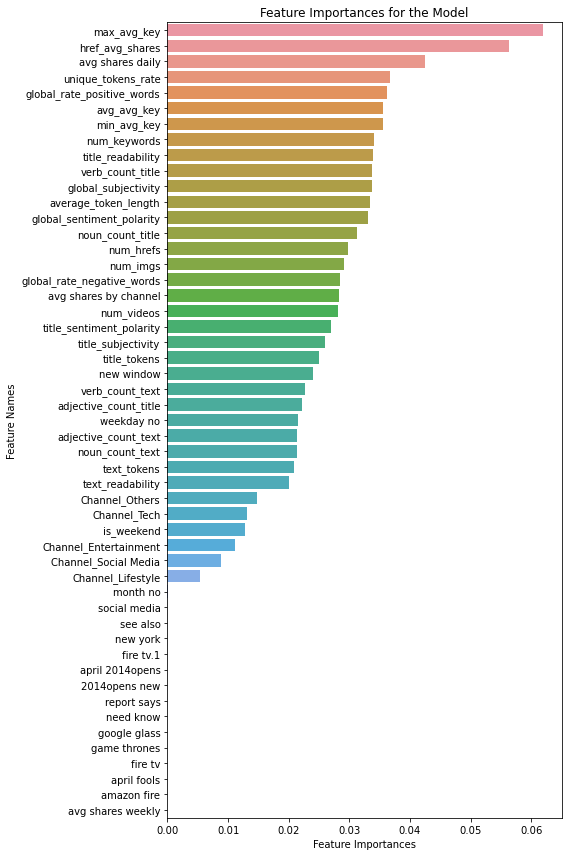

In [23]:
#showing in graph which are the important features we got..
feature_importances = choose.feature_importances_
feature_names = A.columns

# Create a DataFrame with feature importances and their corresponding names
sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sort the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)

# Plotting the sorted feature importances

plt.figure(figsize=(8, 12))
sns.barplot(data=sorted_feature_importances, x='Feature Importance', y='Feature Names', )
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Feature Importances for the Model')
#plt.savefig('fig-4.png')

plt.tight_layout()
plt.show()

In [24]:
sorted_feature_importances['Feature Names'].tolist()

['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'global_rate_positive_words',
 'avg_avg_key',
 'min_avg_key',
 'num_keywords',
 'title_readability',
 'verb_count_title',
 'global_subjectivity',
 'average_token_length',
 'global_sentiment_polarity',
 'noun_count_title',
 'num_hrefs',
 'num_imgs',
 'global_rate_negative_words',
 'avg shares by channel',
 'num_videos',
 'title_sentiment_polarity',
 'title_subjectivity',
 'title_tokens',
 'new window',
 'verb_count_text',
 'adjective_count_title',
 'weekday no',
 'adjective_count_text',
 'noun_count_text',
 'text_tokens',
 'text_readability',
 'Channel_Others',
 'Channel_Tech',
 'is_weekend',
 'Channel_Entertainment',
 'Channel_Social Media',
 'Channel_Lifestyle',
 'month no',
 'social media',
 'see also',
 'new york',
 'fire tv.1',
 'april 2014opens',
 '2014opens new',
 'report says',
 'need know',
 'google glass',
 'game thrones',
 'fire tv',
 'april fools',
 'amazon fire',
 'avg shares weekly']

In [25]:
selected_cols = ['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'global_rate_positive_words',
 'min_avg_key',
 'avg_avg_key',
 'num_keywords',
 'global_sentiment_polarity',
 'verb_count_title',
 'average_token_length',
 'global_subjectivity',
 'title_readability',
 'global_rate_negative_words',
 'num_videos',
 'noun_count_title',
 'num_hrefs',
 'num_imgs',
 'title_sentiment_polarity',
 'avg shares by channel',
 'title_tokens',
 'title_subjectivity',
 'new window',
 'adjective_count_title',
 'weekday no',
 'verb_count_text',
 'adjective_count_text',
 'noun_count_text',
 'text_readability',
 'text_tokens',
 'Channel_Others',
 'Channel_Tech',
 'is_weekend',
 'Channel_Entertainment',
 'Channel_Social Media',
 'Channel_Lifestyle','shares']
selected_df = num_df_treated[selected_cols]
selected_df.head(2)

,max_avg_key,href_avg_shares,avg shares daily,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,verb_count_title,average_token_length,global_subjectivity,title_readability,global_rate_negative_words,num_videos,noun_count_title,num_hrefs,num_imgs,title_sentiment_polarity,avg shares by channel,title_tokens,title_subjectivity,new window,adjective_count_title,weekday no,verb_count_text,adjective_count_text,noun_count_text,text_readability,text_tokens,Channel_Others,Channel_Tech,is_weekend,Channel_Entertainment,Channel_Social Media,Channel_Lifestyle,shares
0,4817.692,1833.333,2441.637795,0.640816,0.036735,1459.5,3370.415,5,0.038762,0.0,4.579592,0.403762,59.97,0.024490,1.0,2,5,3,0.25,2312.03681,3,0.25,0,0,3,28,20,49.0,-40.52,102.0,0,0,0,0,0,0,1600
1,3581.094,8500.000,2233.879630,0.549618,0.044944,0.0,2556.367,7,0.180934,0.0,4.636704,0.410707,80.28,0.003745,0.0,5,4,1,0.00,2676.02551,8,0.00,0,2,4,16,12,20.0,8.21,54.0,0,1,0,0,0,0,1500


- **Setting up the X and y variable for all models to train**

In [26]:
X = selected_df.drop(columns=['shares'])  # Features (excluding 'shares')
y = selected_df[['shares']]  # Target variable
#Creation phase..
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2)

print(X.shape)
print(y.shape)

print((X_train.shape,X_test.shape), (y_train.shape,y_test.shape))

(999, 36)
(999, 1)
((699, 36), (300, 36)) ((699, 1), (300, 1))


### Removing outliers

In [27]:
import pandas as pd
cols2treat = ['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'global_rate_positive_words',
 'min_avg_key',
 'avg_avg_key',
 'num_keywords',
 'global_sentiment_polarity',
 'verb_count_title',
 'average_token_length',
 'global_subjectivity',
 'title_readability',
 'global_rate_negative_words',
 'num_videos',
 'noun_count_title',
 'num_hrefs',
 'num_imgs',
 'title_sentiment_polarity',
 'avg shares by channel',
 'title_tokens',
 'title_subjectivity',
 'new window',
 'adjective_count_title',
 'weekday no',
 'verb_count_text',
 'adjective_count_text',
 'noun_count_text',
 'text_readability',
 'text_tokens',
 'Channel_Others',
 'Channel_Tech',
 'is_weekend',
 'Channel_Entertainment',
 'Channel_Social Media',
 'Channel_Lifestyle']
def treat_outliers_iqr(data, cols_to_treat):
    data_copy = data.copy()
    
    for col in cols_to_treat:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data_copy[col] = data_copy[col].clip(lower=lower_bound, upper=upper_bound)

    return data_copy

# Treat outliers for X_train
X_train = treat_outliers_iqr(X_train, cols2treat)

# Treat outliers for X_test
X_test = treat_outliers_iqr(X_test, cols2treat)



**`Feature Scaling after splittting to remove Data Leakage`**

In [28]:
from sklearn.preprocessing import MinMaxScaler


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))


In [29]:
X_train

array([[1.25520026e-03, 5.40161561e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.65381771e-02, 2.11476909e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48631770e-01, 2.35736443e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.91768929e-03, 1.62576863e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.60305849e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10665096e-02, 2.01188843e-01, 2.13338220e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

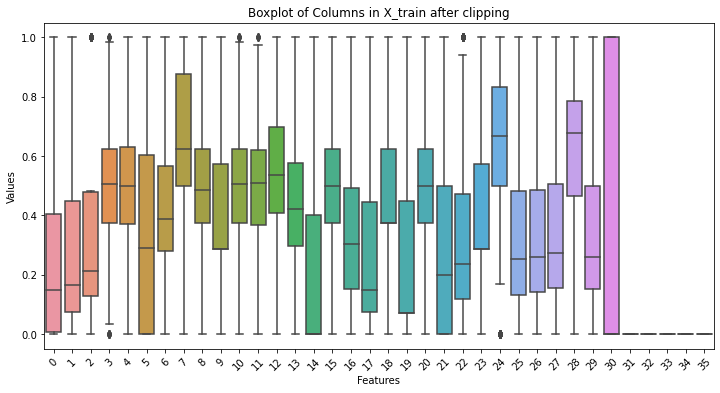

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = X_train)

plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in X_train after clipping')
plt.show()

In [31]:
'''plt.figure(figsize=(12, 6))
sns.boxplot( data = X_train)

plt.xticks(rotation=45)  
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in X_test before clipping')
plt.show()'''

"plt.figure(figsize=(12, 6))\nsns.boxplot( data = X_train)\n\nplt.xticks(rotation=45)  \nplt.xlabel('Features')\nplt.ylabel('Values')\nplt.title('Boxplot of Columns in X_test before clipping')\nplt.show()"

## neural network and hyperparameter

In [32]:
'''import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def build_nn_model(neurons=1024, n_layers=3):
    model = keras.Sequential()
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# keras modelling
nn_regressor = KerasRegressor(build_fn=build_nn_model, verbose=0)

# Defininge the hyperparameter grid for tuning
param_grid = {
    'neurons': [256, 512, 1024],  
    'n_layers': [2, 3, 5],        
    'batch_size': [32, 64],       
    'epochs': [10, 20]            
}

# GridSearchCV
grid_search = GridSearchCV(estimator=nn_regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train, verbose=0)

# the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Test R2 Score:", test_r2)
'''

'import numpy as np\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import r2_score\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.wrappers.scikit_learn import KerasRegressor\n\ndef build_nn_model(neurons=1024, n_layers=3):\n    model = keras.Sequential()\n    for _ in range(n_layers):\n        model.add(layers.Dense(neurons, activation=\'relu\'))\n    model.add(layers.Dense(1))  # Output layer for regression\n    model.compile(optimizer=\'adam\', loss=\'mean_squared_error\')\n    return model\n\n# keras modelling\nnn_regressor = KerasRegressor(build_fn=build_nn_model, verbose=0)\n\n# Defininge the hyperparameter grid for tuning\nparam_grid = {\n    \'neurons\': [256, 512, 1024],  \n    \'n_layers\': [2, 3, 5],        \n    \'batch_size\': [32, 64],       \n    \'epochs\': [10, 20]            \n}\n\n# GridSearchCV\ngrid_search = GridSearchCV(estimator=nn_regressor, param_grid=param_grid, \n                           sco

### Here, splitting the testing data into J_test and k_test

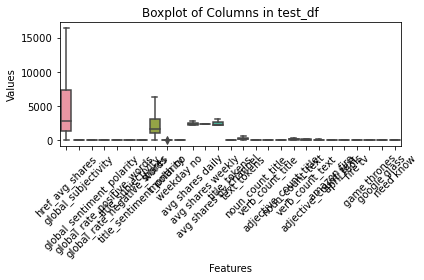

In [33]:
sns.boxplot(data=test_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [34]:
testA = test_df_treated.drop(columns=['shares'])  # Features (excluding 'shares')
testb = test_df_treated[['shares']]  # Target variable
#Creation phase..
testA_train, testA_test, testb_train, testb_test = train_test_split(testA,testb, test_size = 0.3, random_state=2)

print(testA.shape)
print(testb.shape)

print((testA_train.shape,testA_test.shape), (testb_train.shape,testb_test.shape))

(999, 51)
(999, 1)
((699, 51), (300, 51)) ((699, 1), (300, 1))


In [35]:
#fitting the train data
from sklearn.ensemble import ExtraTreesRegressor
choose = ExtraTreesRegressor()
choose.fit(testA,testb)

ExtraTreesRegressor()

In [36]:

feature_importances = choose.feature_importances_
feature_names = testA.columns

# Creatinge a DataFrame with feature importances and their corresponding names
sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sorting the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)

sorted_feature_importances['Feature Names'].tolist()

['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'global_rate_positive_words',
 'min_avg_key',
 'avg_avg_key',
 'global_sentiment_polarity',
 'num_keywords',
 'verb_count_title',
 'title_readability',
 'global_subjectivity',
 'average_token_length',
 'noun_count_title',
 'num_videos',
 'global_rate_negative_words',
 'num_hrefs',
 'num_imgs',
 'new window',
 'avg shares by channel',
 'title_subjectivity',
 'title_tokens',
 'title_sentiment_polarity',
 'adjective_count_title',
 'verb_count_text',
 'adjective_count_text',
 'text_readability',
 'weekday no',
 'noun_count_text',
 'text_tokens',
 'Channel_Tech',
 'Channel_Others',
 'is_weekend',
 'Channel_Entertainment',
 'Channel_Social Media',
 'Channel_Lifestyle',
 'month no',
 'social media',
 'see also',
 'new york',
 'fire tv.1',
 'april 2014opens',
 '2014opens new',
 'report says',
 'need know',
 'google glass',
 'game thrones',
 'fire tv',
 'april fools',
 'amazon fire',
 'avg shares weekly']

In [37]:
#selected_cols of train_df
selected_testdf = test_df_treated[selected_cols]
selected_testdf.head(2)

,max_avg_key,href_avg_shares,avg shares daily,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,verb_count_title,average_token_length,global_subjectivity,title_readability,global_rate_negative_words,num_videos,noun_count_title,num_hrefs,num_imgs,title_sentiment_polarity,avg shares by channel,title_tokens,title_subjectivity,new window,adjective_count_title,weekday no,verb_count_text,adjective_count_text,noun_count_text,text_readability,text_tokens,Channel_Others,Channel_Tech,is_weekend,Channel_Entertainment,Channel_Social Media,Channel_Lifestyle,shares
0,4817.692,1833.333,2441.637795,0.640816,0.036735,1459.5,3370.415,5,0.038762,0.0,4.579592,0.403762,59.97,0.024490,1.0,2,5,3,0.25,2312.03681,3,0.25,0,0,3,28,20,49.0,-40.52,102.0,0,0,0,0,0,0,1600
1,3581.094,8500.000,2233.879630,0.549618,0.044944,0.0,2556.367,7,0.180934,0.0,4.636704,0.410707,80.28,0.003745,0.0,5,4,1,0.00,2676.02551,8,0.00,0,2,4,16,12,20.0,8.21,54.0,0,1,0,0,0,0,1500


In [38]:
#J for the dependent var while k for independent or target
J = selected_testdf.drop(columns = 'shares')
k = selected_testdf['shares']
from sklearn.model_selection import train_test_split
J_train, J_test, k_train, k_test = train_test_split(J, k, test_size=0.3, random_state=2)

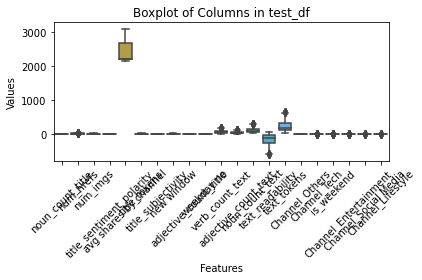

In [39]:
sns.boxplot(data=J_test.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [40]:
def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers
    return num

#num_df_treated = num_df.copy()

for col in cols2treat:
    J_test = treat_outliers_iqr(J_test, col)

print("\nDistribution (after outlier treatment using IQR method):")
J_test.describe()


Distribution (after outlier treatment using IQR method):


,max_avg_key,href_avg_shares,avg shares daily,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,verb_count_title,average_token_length,global_subjectivity,title_readability,global_rate_negative_words,num_videos,noun_count_title,num_hrefs,num_imgs,title_sentiment_polarity,avg shares by channel,title_tokens,title_subjectivity,new window,adjective_count_title,weekday no,verb_count_text,adjective_count_text,noun_count_text,text_readability,text_tokens,Channel_Others,Channel_Tech,is_weekend,Channel_Entertainment,Channel_Social Media,Channel_Lifestyle
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0,300.0,300.0,300.0
mean,5455.544586,5036.610365,2331.725764,0.535532,0.037471,1049.686669,3268.057818,7.216667,0.105605,1.340000,4.687887,0.455375,61.560283,0.017043,0.556667,3.743333,10.426667,4.433333,0.055169,2367.642227,6.693333,0.279664,3.396667,1.103333,3.786667,61.846667,44.997083,105.330833,-176.706467,229.476667,0.353333,0.0,0.0,0.0,0.0,0.0
std,2249.435920,5052.924916,181.063431,0.106747,0.014026,1187.505875,1109.383785,1.846009,0.094625,0.907641,0.283880,0.092347,24.318938,0.010053,0.833128,1.294750,7.810225,5.244416,0.169361,256.177209,1.577207,0.303130,3.482300,0.974245,1.930521,46.186665,33.199215,74.124420,172.089313,166.578482,0.478804,0.0,0.0,0.0,0.0,0.0
min,3568.870000,0.000000,2157.572687,0.272165,0.004347,0.000000,1360.101000,2.000000,-0.114407,0.000000,3.964607,0.233144,0.755000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.225000,2139.983784,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,10.000000,-599.405000,21.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,3610.023250,1448.062500,2233.879630,0.462525,0.029270,0.000000,2481.021250,6.000000,0.047226,1.000000,4.504348,0.401301,48.470000,0.010128,0.000000,3.000000,5.000000,1.000000,0.000000,2208.388571,6.000000,0.000000,1.000000,0.000000,3.000000,27.000000,19.000000,49.000000,-267.627500,102.750000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4489.414000,3082.250000,2284.658768,0.536733,0.036788,790.250000,3003.295500,7.000000,0.102246,1.000000,4.704894,0.459941,63.360000,0.015926,0.000000,4.000000,8.000000,2.000000,0.000000,2208.388571,7.000000,0.200000,2.000000,1.000000,4.000000,47.500000,34.500000,81.500000,-122.740000,176.500000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,6558.569500,7270.499750,2441.637795,0.608847,0.045885,1988.323000,3987.344000,9.000000,0.163678,2.000000,4.864176,0.513406,80.280000,0.022836,1.000000,5.000000,14.000000,8.000000,0.152500,2676.025510,8.000000,0.500000,5.000000,2.000000,5.000000,84.500000,60.750000,140.250000,-46.442500,317.250000,1.000000,0.0,0.0,0.0,0.0,0.0
max,10981.388875,16004.155625,2753.275044,0.791285,0.070809,3602.060000,5720.423500,10.000000,0.329107,3.500000,5.403917,0.680424,117.160000,0.039680,2.500000,8.000000,27.500000,16.000000,0.375000,3106.109091,11.000000,1.000000,11.000000,4.000000,6.000000,170.750000,123.375000,277.125000,50.170000,639.000000,1.000000,0.0,0.0,0.0,0.0,0.0


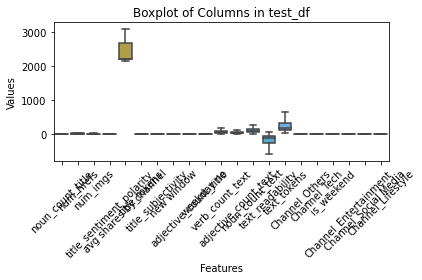

In [41]:
sns.boxplot(data=J_test.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler


scaler_J = MinMaxScaler()
scaler_k = MinMaxScaler()


J_train = scaler_J.fit_transform(J_train)
k_train = scaler_k.fit_transform(k_train.values.reshape(-1, 1))


J_test = scaler_J.transform(J_test)
k_test = scaler_k.transform(k_test.values.reshape(-1, 1))


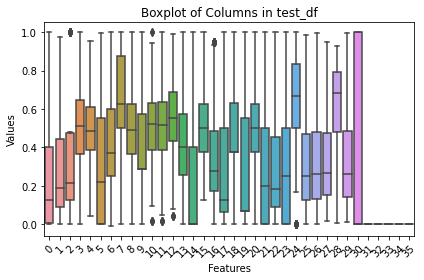

In [43]:
sns.boxplot(data=J_test)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

## 5.2 Random Forest Regressor


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
rf_regressor.score(X_train, y_train)

0.8581659470602635

In [48]:
rf_regressor.score(J_test,k_test)

0.0460178979477035

In [49]:
y_pred_rf = rf_regressor.predict(J_test)

In [ ]:
'''#ensembling phase
#fitting the train data
rfr.fit(X_train, y_train)
#finally predict on test data
y_pred = rfr.predict(X_test)

from sklearn.metrics import r2_score
#scoring 
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')'''

In [ ]:
'''sns.scatterplot(x=y_testest, y=y_pred, hue=r2,alpha=1)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

plt.show()'''

### Hyperparameter tuning for RFR

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import numpy as np
from scipy.stats import randint

#assigning the ensemble learning model
#rf_classifier = RandomForestClassifier()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1234) 
#generating the parameter distributions


param_dist = {
    'n_estimators': np.linspace(10, 100, num=10, dtype='int'),
    'max_depth': randint(1, 10),
    'max_features': ['auto', 'sqrt'],  # Added a comma here cz of dictionary
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Creating RandomizedSearchCV object

rf_comb = RandomizedSearchCV(
    estimator=rf_regressor, 
    param_distributions=param_dist, 
    scoring='neg_mean_squared_error', 
    verbose=2, 
    cv=5, 
    random_state=1234,
    n_iter = 7
)
# Fitting
rf_comb.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=8, n_estimators=90; total time= 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1234),
                   n_iter=7,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B2C7034A60>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B2DDAB9520>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B2D9DFD730>,
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=1234, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
#printing our best parameter
print(f'Best HyperParameters are: {rf_comb.best_params_}\n')
print("Best Score:", rf_comb.best_score_)

#predicting and using it for later purposes
HyperPred = rf_comb.predict(J_test)



Best HyperParameters are: {'bootstrap': False, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 60}

Best Score: -0.07919371041404397


In [52]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, HyperPred))
print('R2:', metrics.r2_score(y_test, HyperPred))
print('MSE:', metrics.mean_squared_error(y_test, HyperPred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, HyperPred)))

MAE: 0.23715515448316163
R2: 0.03559126639844978
MSE: 0.09093265773624527
RMSE: 0.30155042320687475


## with gridsearchCV


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Test R2 Score:", test_r2)


y_testest = y_test['shares'].values.ravel()

'''a = y_testest -rsc_pred
sns.histplot(a)
plt.show()'''

## 4. Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#X = selected_df.drop(columns=['shares'])  # Features (excluding 'shares')
#y = selected_df['shares']  # Target variable


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Again, the r-score is bad and wil be underfitting

## 5. Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

lasso_model = Lasso(alpha=1.0)  

lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)




## XGB

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)


### model -3 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Step 1: Train-Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Cross-Validation
model = RandomForestRegressor()  # You can use other models as well
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", scores)

# Step 3: Regularization 
#  with Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust the alpha parameter for stronger/weaker regularization
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score with Ridge Regression on Test Data:", r2)

final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
print("Final R2 Score on Test Data:", final_r2)


# ROUGH
-----
### practices of other models


In [ ]:
pi=0.95
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
z_score

In [ ]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
    '''
    Get the interval estimate for the regression model.
    
    INPUTS: 
        - actual_values (y_train)
        - predicted_values (prediction from x_train)
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Interval estimate
    '''
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev

    return interval
def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    '''
    Get a prediction interval for the regression model.
    
    INPUTS: 
        - Single prediction (test data), 
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single test prediction
    '''
    
    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev
    
    
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]

In [ ]:
# Model training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(X_train,y_train)))

In [ ]:
preds_lr = linear_reg.predict(X_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

In [ ]:
#pd.DataFrame(zip(linear_reg.coef_.T, X_train.columns))


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
print("Training R2 score: "+ str(ridge.score(X_train,y_train)))

In [ ]:
preds_rid = ridge.predict(X_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

## Hyperparameter tuning for LR

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

#taking linear_reg from the helper function and the linear regression we did down
grid_search = GridSearchCV(linear_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('R2:', metrics.r2_score(y_test, y_pred))

In [ ]:
'''num_df_treated['global_sentiment_polarity'] = num_df_treated['global_sentiment_polarity'].abs()
num_df_treated['title_sentiment_polarity'] = num_df_treated['title_sentiment_polarity'].abs()'''


## pickling

In [53]:
import pickle

file = open('News.pkl', 'wb')

pickle.dump(rf_regressor, file)

In [57]:
model8= open('News.pkl', 'rb')
newsgive = pickle.load(model8)

EOFError: Ran out of input

In [ ]:
y_PPPred = newsgive.predict(J_test)

In [ ]:
metrics.r2_score(y_test, y_PPPred)